# Clustering
Here we will build a model for clustering. In this case we will first lower the dimension with principal component analysis. And then, with the help of k-means clustering, we will cluster our data, which has already been reduced in size.

## Importing libraries

In [4]:
#importing main data analysis libraries
import pandas as pd
import numpy as np
#importing main visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#importing modules from sklearn for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [5]:
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

<ipython-input-5-34de36fbe7a1>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
df = pd.read_csv('data_for_clustering.csv')

In [7]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)

## PCA

Here we will lower the number of dimensions of our data using PCA, because our data have a lot of dimensions(23 features!), so our algorithm could work in a wrong way.

In [8]:
pca = PCA(n_components= 2)

In [9]:
pca_1 = pca.fit_transform(df)

In [10]:
pca_1

array([[-1.03216096, -0.48325021],
       [-1.04583761, -0.49053586],
       [-1.04453253, -0.4897778 ],
       ...,
       [ 1.11057925, -0.29751753],
       [ 1.03932486, -0.13170906],
       [ 1.1053886 , -0.34154552]])

In [11]:
pca.components_

array([[ 0.25714918,  0.16424275,  0.15788292,  0.11269237,  0.05245157,
        -0.07744253, -0.27525037, -0.23308815, -0.29286483, -0.28022644,
        -0.22299863, -0.1811215 , -0.1537305 , -0.15777854, -0.08242805,
         0.14006449,  0.19568006,  0.21964849,  0.21082608,  0.21291777,
         0.20680796,  0.24894094,  0.24435476,  0.26056267],
       [-0.08922735, -0.08579964, -0.15241935, -0.3177736 , -0.35963602,
        -0.31841364, -0.12348188, -0.13434837, -0.06907422, -0.04861819,
         0.09451605,  0.22809403,  0.22895619,  0.26907394,  0.19605409,
         0.06242188,  0.24088815,  0.31777331,  0.32844111,  0.20718251,
         0.02896564, -0.14050782, -0.13902537, -0.10713265]])

In [12]:
new_df = pd.DataFrame({'PCA_1': pca_1[:, 0], 'PCA_2': pca_1[:, 1]})

In [13]:
new_df.head()

,PCA_1,PCA_2
0,-1.032161,-0.483250
1,-1.045838,-0.490536
2,-1.044533,-0.489778
3,-1.028029,-0.485564
4,-1.044533,-0.489778


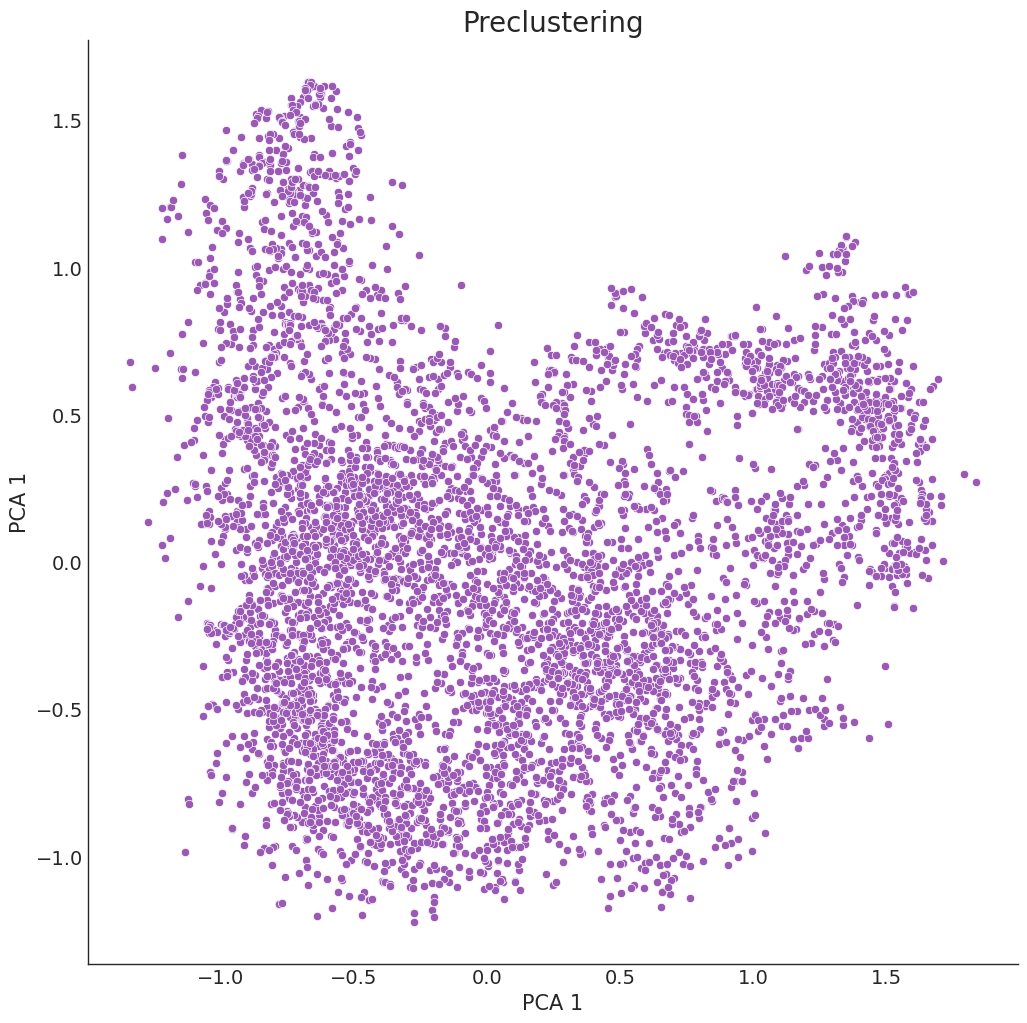

In [14]:
cluster_test = plt.subplots(figsize=(12, 12))

cluster_test = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, color = '#9b59b6')


sns.despine()
cluster_test.set_xlabel('PCA 1', fontsize = 15)
cluster_test.set_ylabel('PCA 1', fontsize = 15)
cluster_test.set_title('Preclustering', fontsize = 20)
plt.show()

## K-means clustering

Here we will cluster our features. If you look at the previous stage, you can see that we have five distinct clusters. That’s the number of clusters we’re going to divide our data into. Apart from me, several configurations were tried where the final number best described our data.

In [15]:
kmeans = KMeans(n_clusters = 5)

In [16]:
kmeans.fit_transform(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2.36527263, 0.52011041, 1.5279619 , 1.46420424, 0.89617185],
       [2.38070563, 0.53097059, 1.53769344, 1.47820335, 0.91080252],
       [2.37920849, 0.52994268, 1.53669906, 1.4768632 , 0.9093591 ],
       ...,
       [0.7337704 , 1.68441339, 2.27914926, 0.69068824, 1.60825525],
       [0.57725281, 1.65831489, 2.12732228, 0.67301043, 1.49757583],
       [0.77800929, 1.67079137, 2.30066303, 0.67917325, 1.61687177]])

In [17]:
new_df['cluster'] = kmeans.labels_

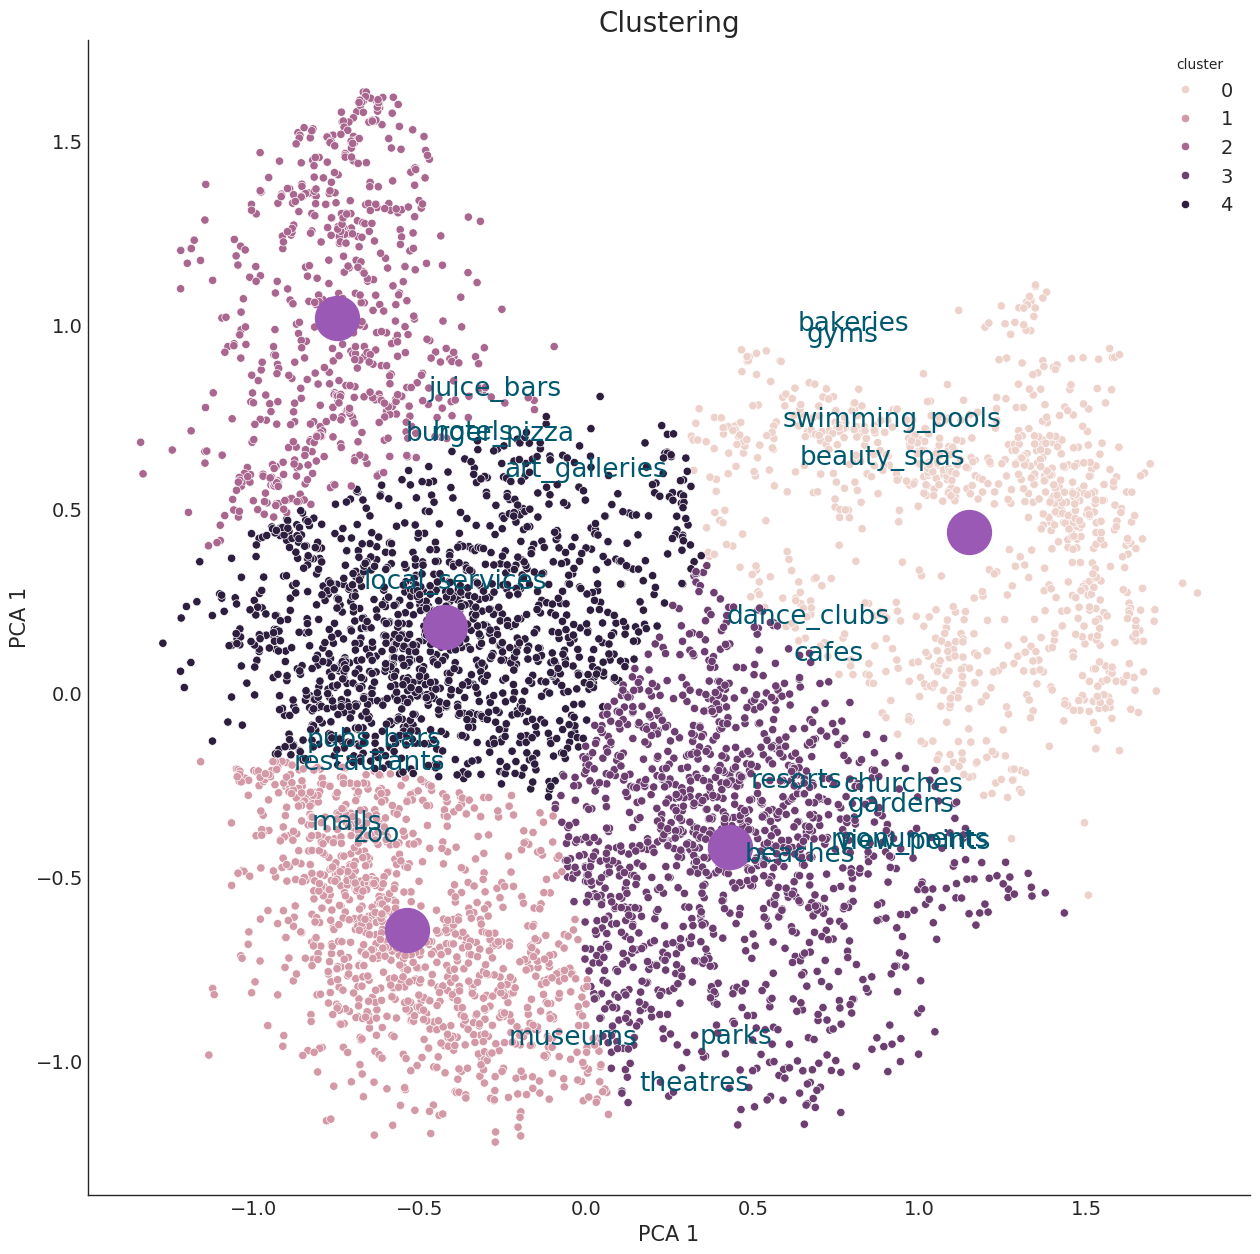

In [18]:
cluster = plt.subplots(figsize=(15, 15))
cluster = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, hue = 'cluster')
cluster.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 1000, marker = 'o')

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
columns = list(df.columns)

for i in range(n):
    plt.text(coeff[i,0]*3, coeff[i,1]*3, columns[i], size = 19,color = '#00586e')


sns.despine()
cluster.set_xlabel('PCA 1', fontsize = 15)
cluster.set_ylabel('PCA 1', fontsize = 15)
cluster.set_title('Clustering', fontsize = 20)
plt.show()

# Conclusion

Here we summarize the results of our clustering.

Based on the visualization presented above, we can say that we have five groups of people who give estimates:

1. People who visit spas, swimming pools, gyms and bakeries. And what’s very interesting is maybe we should go into that and explore that relationship.

2. People who have visited shopping malls, zoos, restaurants, etc.

3. People who visit local services, bars, art galleries, etc.

4. People who visit parks, beaches, theatres, gardens, etc.

5. People who have visited burgers and pizzerias, hotels and bars.